,Drug Name,Reaction,Count
0,Aspirin,Off label use,420
1,Aspirin,Pain,399
2,Aspirin,Fatigue,366
3,Aspirin,Fall,326
4,Aspirin,Headache,316
5,Ibuprofen,Headache,252
6,Ibuprofen,Pain,251
7,Ibuprofen,Fatigue,227
8,Ibuprofen,Drug ineffective,186
9,Ibuprofen,Off label use,179


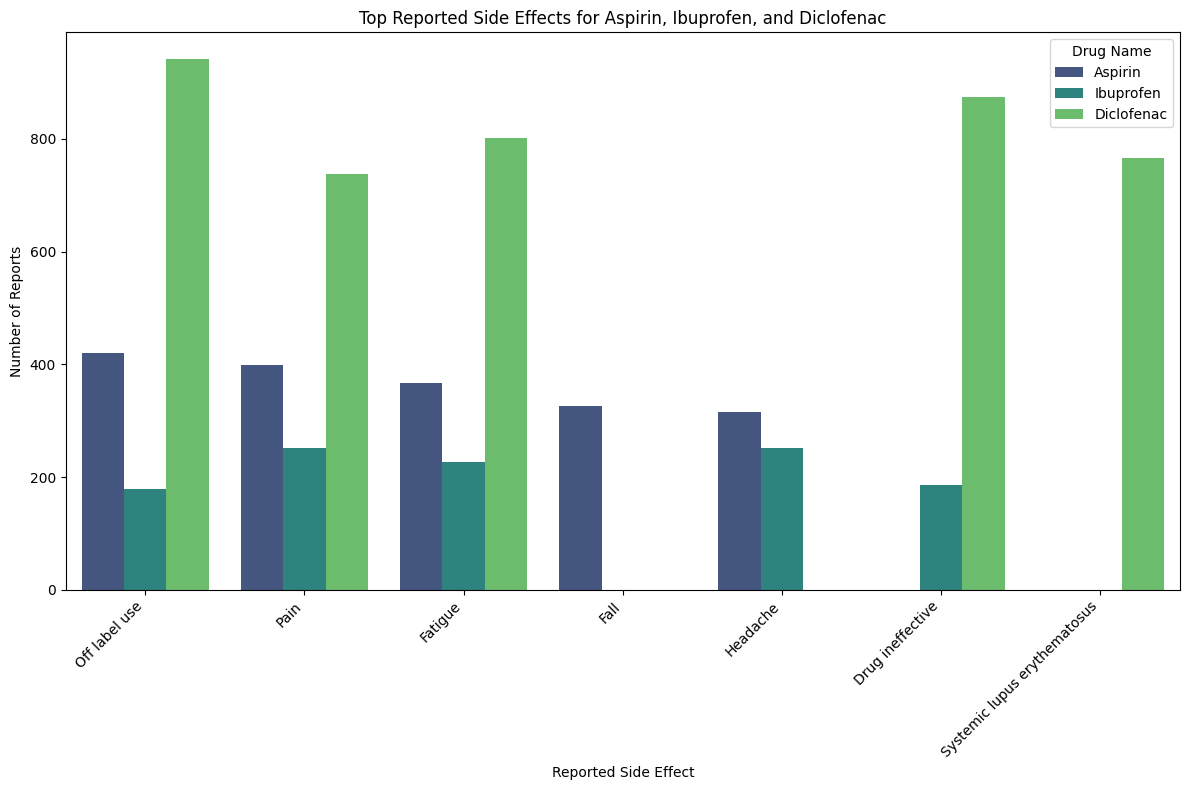

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drug = pd.read_csv("DRUG25Q2.txt", delimiter = "$", encoding = "latin-1", low_memory = False)
reac = pd.read_csv("REAC25Q2.txt", delimiter = "$", encoding = "latin-1", low_memory = False)
indication = pd.read_csv("INDI25Q2.txt", delimiter = "$", encoding = "latin-1", low_memory = False)
drug_reac =pd.merge(drug, reac, on = "primaryid")


aspirin_reactions = drug_reac[drug_reac['drugname'].str.contains('ASPIRIN', na=False, case=False)]
ibuprofen_reactions = drug_reac[drug_reac['drugname'].str.contains('IBUPROFEN', na=False, case=False)]
diclofenac_reactions = drug_reac[drug_reac['drugname'].str.contains('DICLOFENAC', na=False, case=False)]


top_aspirin_reactions = aspirin_reactions['pt'].value_counts().head(5)

top_ibuprofen_reactions = ibuprofen_reactions['pt'].value_counts().head(5)
top_diclofenac_reactions = diclofenac_reactions['pt'].value_counts().head(5)

top_reactions_df = pd.concat([top_aspirin_reactions, top_ibuprofen_reactions, top_diclofenac_reactions], keys=['Aspirin', 'Ibuprofen', 'Diclofenac'])
top_reactions_df = top_reactions_df.reset_index()
top_reactions_df.columns = ['Drug Name', 'Reaction', 'Count']
print(top_reactions_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='Reaction', y='Count', hue='Drug Name', data=top_reactions_df, palette='viridis')
plt.title('Top Reported Side Effects for Aspirin, Ibuprofen, and Diclofenac')
plt.xlabel('Reported Side Effect')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('top_reactions_grouped_bar_chart.png')

plt.show()